# EDA on Smoke Detection Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import warnings
import csv
import sys
import os

from collections import defaultdict, Counter

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, precision_score, recall_score, 

%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('ticks')
sb.set()

warnings.filterwarnings('ignore')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\antonie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [43]:
df = pd.read_csv("D:\Open Classroom\Datasets\Smoke Detection Dataset\smoke_detection_iot.csv")
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [44]:
df.shape

(62630, 16)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [46]:
round(df.describe())

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.0,6.263000e+04,62630.0,62630.0,62630.0,62630.0,62630.0,62630.0,62630.0,62630.0,62630.0,62630.0,62630.0,62630.0,62630.0,62630.0
mean,31314.0,1.654792e+09,16.0,49.0,1942.0,670.0,12942.0,19754.0,939.0,101.0,184.0,491.0,204.0,80.0,10511.0,1.0
std,18080.0,1.100020e+05,14.0,9.0,7812.0,1906.0,272.0,610.0,1.0,923.0,1976.0,4266.0,2215.0,1083.0,7598.0,0.0
min,0.0,1.654712e+09,-22.0,11.0,0.0,400.0,10668.0,15317.0,931.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,15657.0,1.654743e+09,11.0,48.0,130.0,400.0,12830.0,19435.0,939.0,1.0,1.0,9.0,1.0,0.0,3625.0,0.0
50%,31314.0,1.654762e+09,20.0,50.0,981.0,400.0,12924.0,19501.0,939.0,2.0,2.0,12.0,2.0,0.0,9336.0,1.0
75%,46972.0,1.654778e+09,25.0,53.0,1189.0,438.0,13109.0,20078.0,939.0,2.0,2.0,14.0,2.0,0.0,17165.0,1.0
max,62629.0,1.655130e+09,60.0,75.0,60000.0,60000.0,13803.0,21410.0,940.0,14334.0,45432.0,61482.0,51915.0,30026.0,24993.0,1.0


In [47]:
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [48]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

Text(0.5, 1.0, 'Pearsons Correlation of Columns')

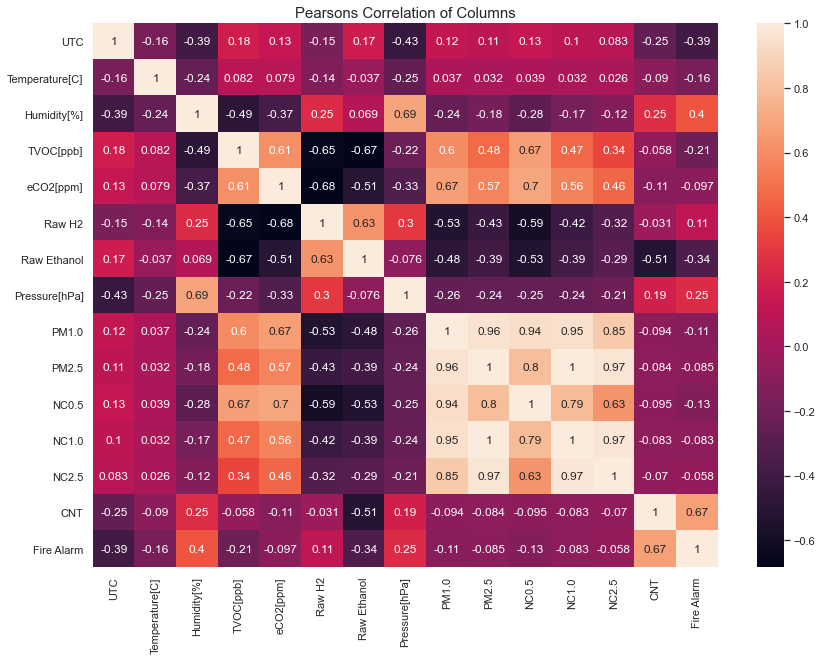

In [49]:
plt.figure(figsize = (14, 10))
sb.heatmap(df.corr(), annot = True)
plt.title('Pearsons Correlation of Columns', fontdict={'size': 15})

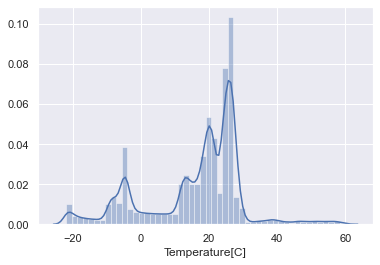

In [50]:
sb.distplot(df['Temperature[C]'])

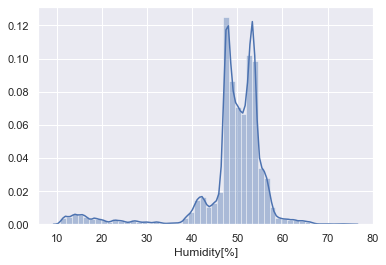

In [51]:
sb.distplot(df['Humidity[%]'])

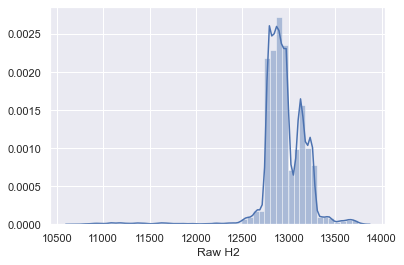

In [52]:
sb.distplot(df['Raw H2'])

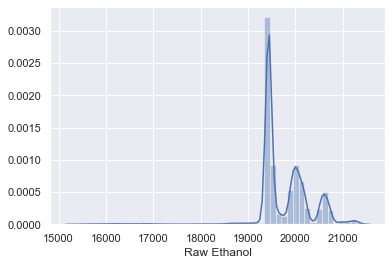

In [53]:
sb.distplot(df['Raw Ethanol'])

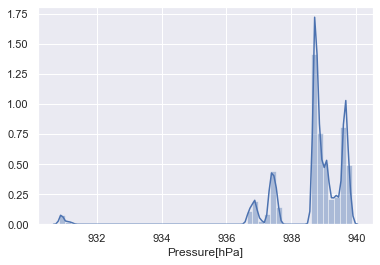

In [54]:
sb.distplot(df['Pressure[hPa]'])

### Feature Engineering

In [55]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [56]:
x = df.drop(columns = ['Fire Alarm'])
y = df['Fire Alarm']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

print('x train: ', x_train.shape)
print('x test: ', x_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (50104, 14)
x test:  (12526, 14)
y train:  (50104,)
y test:  (12526,)


In [79]:
def run_experiment(model):
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    plot_confusion_matrix(model, x_test, y_test, cmap = 'Blues')
    plt.title('Confusion Matrix for '+ str(model))
    %time plt.show()
    
    
    print('Model Evaluation Metrics Report')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print('\n') 
    

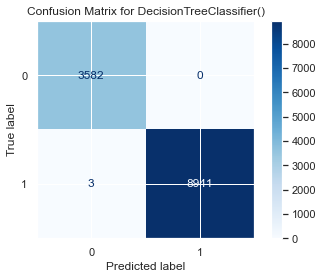

Wall time: 250 ms
Model Evaluation Metrics Report
Precision: 1.0
F1 Score: 0.999832261671792
Recall: 0.9996645796064401
Accuracy: 0.9997604981638193




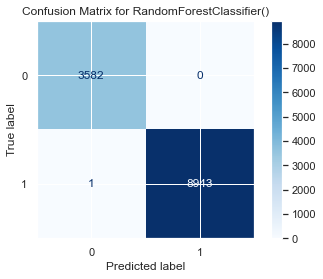

Wall time: 165 ms
Model Evaluation Metrics Report
Precision: 1.0
F1 Score: 0.9999440934757087
Recall: 0.9998881932021467
Accuracy: 0.9999201660546064




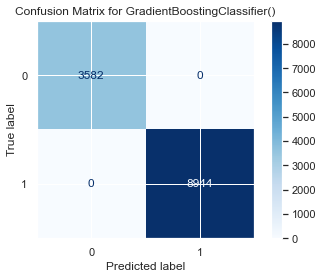

Wall time: 191 ms
Model Evaluation Metrics Report
Precision: 1.0
F1 Score: 1.0
Recall: 1.0
Accuracy: 1.0




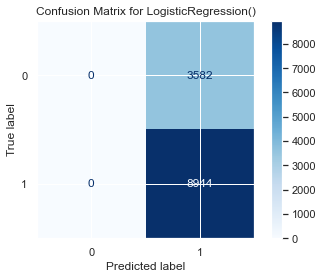

Wall time: 176 ms
Model Evaluation Metrics Report
Precision: 0.7140348076001916
F1 Score: 0.8331625523986959
Recall: 1.0
Accuracy: 0.7140348076001916




In [80]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()


run_experiment(dtc)
run_experiment(rfc)
run_experiment(gbc)
run_experiment(lr)

Therefore we note that GradientBoostingClassifier model outperformed all other models, and has the best score for training and testing future captured datasets

#### Manual Testing

In [85]:
def Manual_Testing(model, data):
    
    input_data = data
    
    input_data_to_array = np.asarray(input_data)
    
    reshape_data = input_data_to_array.reshape(1, -1)
    
    model.fit(x_train, y_train)
    
    pred = model.predict(reshape_data)
    
    if pred == 0:
        print('No smoke Detected')
    else:
        print('Smoke Detected \nOpen Fire Alarm')
    

In [86]:
data = (1654778179, 25.070, 50.82, 1161, 411, 12890, 19451, 938.760, 1.39, 1.44, 9.56, 1.491, 0.034, 16836)
Manual_Testing(gbc, data)

Smoke Detected 
Open Fire Alarm


In [83]:
df.sample(4).head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
11496,1654744827,11.823,48.81,1103,646,12793,19446,939.061,2.16,2.24,14.84,2.313,0.052,11496,1
7642,1654740973,-4.103,56.37,284,400,13119,19979,939.440,0.37,0.38,2.53,0.395,0.009,7642,1
41830,1654778179,25.070,50.82,1161,411,12890,19451,938.760,1.39,1.44,9.56,1.491,0.034,16836,1
56936,1655124358,22.810,38.38,22,436,12858,20770,937.577,2.07,2.15,14.21,2.216,0.050,50,0
